In [3]:
# Imports
import numpy as np
import pandas as pd
from pandas import ExcelFile
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from os import listdir
from os.path import isfile, join


Function of the file parser: The useful data is extracted and analyzed and then shown to the user.


In [1]:
def file_parser(show_results):
    '''file_parser parses the data set files. The useful data is extracted and analyzed
    and then shown to the user

    Input: integer
        0: just gives the list output features and target
        1: plots missing students in the final
        2: plots missing students in the sessions
        3: outputs an analysis of the students

    Output: list
        feature and target data
    '''
    # Preprocessing
    warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')
    names = ['session', 'student_Id', 'exercise', 'activity', 'start_time', 'end_time', 'idle_time',
             'mouse_wheel', 'mouse_wheel_click', 'moue_click_left', 'mouse_click_right', 'mouse_mouvement', 'keystroke']
    mean_std_labels = ['mean_idle', 'mean_m_weehl', 'mean_m_wheel_click', 'mean_clik_left', 'mean_click_right', 'mean_m_mouvement',
                       'mean_keystroke', 'std_idle', 'std_m_weehl', 'std_m_wheel_click', 'std_clik_left', 'std_click_right', 'std_mouvement', 'std_keystroke']
    numberofstudents = 115
    numberofsessions = 6
    Maximum = float('-inf')
    MaxId = ""
    Minimum = float('inf')
    MinId = ""
    scaled = []
    files_per_session = []  
    input = [[[0 for i in range(len(mean_std_labels))]for j in range(
        numberofsessions)]for k in range(numberofstudents)]
    unscaled = [[0 for i in range(len(mean_std_labels))]
                for j in range(numberofstudents)]
    scaler = preprocessing.MinMaxScaler()
    target_data = pd.read_excel('../dataset/final_grades_transformed.xlsx',
                                engine='openpyxl', sheet_name='Exam (Second time)')
    id_list = target_data['StudentID'].values
    # Binarize Target
    # 1 if greater than 50, 0 otherwise
    target_data['TOTAL'] = (target_data['TOTAL'] >= 50.0).astype(int)
    target = target_data['TOTAL'].values
    plotx = [[False for i in range(numberofstudents)]
             for j in range(numberofsessions)]
    ploty = [[False for i in range(numberofstudents)]
             for j in range(numberofsessions)]
    for session in range(numberofsessions):
        path = "../Data/Processes/Session "+str(session+1)
        files = [f for f in listdir(path) if (
            isfile(join(path, f)) and f != '.gitkeep')]
        files_per_session.append(len(files))
        for f in files:
            data = pd.read_csv(join(path, f), sep=',', names=names)
            data = data.iloc[:, 6:]
            if data.shape[0] > Maximum:
                Maximum = data.shape[0]
                MaxId = "Student ID: "+f, "Session: "+str(session)
            if data.shape[0] < Minimum:
                Minimum = data.shape[0]
                MinId = "Student ID: "+f, "Session: "+str(session)
            mean_data = data.mean(axis=0)
            std_data = data.std(axis=0)
            mean_std = pd.concat([mean_data, std_data], axis=0)
            unscaled[int(f)-1] = (mean_std.values.reshape(-1))
            plotx[session][int(f)-1] = True
            ploty[session][int(f)-1] = int(f)in id_list
        scaled.append(scaler.fit_transform(unscaled))

    Minimum = int(Minimum)
    Maximum = int(Maximum)

    selected = [[[0 for i in range(len(mean_std_labels))]for j in range(
        numberofsessions)]for k in range(len(id_list))]
    i = 0
    for student in id_list:
        for session in range(numberofsessions):
            input[student-1][session] = scaled[session][student-1]
            selected[i][session] = scaled[session][student-1]
        i += 1


    if show_results == 1:
        datax = np.array(ploty)
        sns.heatmap(datax,yticklabels=False)

        plt.title('Heatmap of Absent Students in the Final Exam',
                fontsize=14)  # title with fontsize 20
        plt.xlabel('Student ID', fontsize=12)  # x-axis label with fontsize 15
        plt.ylabel('Final Exam', fontsize=12)
    elif show_results == 2:
        datax = np.array(plotx)
        sns.heatmap(datax)
        plt.title('Heatmap of Absent Students per Session',
                fontsize=14)  # title with fontsize 20
        plt.xlabel('Student ID', fontsize=12)  # x-axis label with fontsize 15
        plt.ylabel('Session', fontsize=12)
    elif show_results == 3:

        print(Minimum, MinId)
        print(Maximum, MaxId)
        plt.title('Number of Attending Students per Session',
                  fontsize=14)  # title with fontsize 20
        plt.xlabel('Session', fontsize=12)  # x-axis label with fontsize 15
        plt.ylabel('Number of Students', fontsize=12)
        plt.bar(range(1, 7), files_per_session)
    
    return selected, target


In [4]:
[features, target] = file_parser(0)

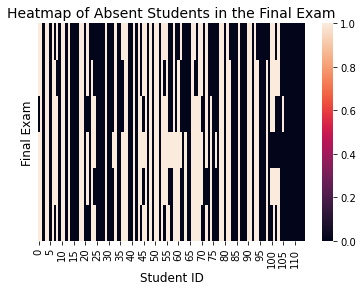

In [5]:
[features, target] = file_parser(1)


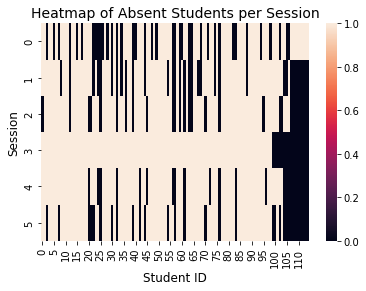

In [6]:
[features, target] = file_parser(2)


87 ('Student ID: 98', 'Session: 1')
1087 ('Student ID: 32', 'Session: 5')


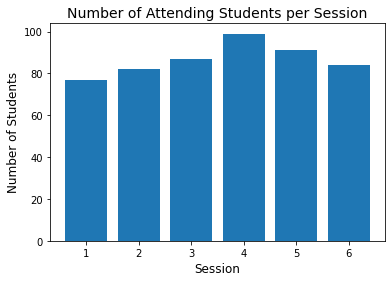

In [7]:
[features, target] = file_parser(3)
